# COMP4096 Business Intelligence Group Project
## COVID-19 Data Analysis and Prediction

#### This part is written by Wong Tin Yau David (18207871).

##### Datasets below are downloaded from https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv, which is provided by https://ourworldindata.org/. (An Open Source Project). With Filtering (only select data after 2021 because vaccines releases in this year and we would like to see the effectiveness)

### 1. Import Data 'owid-covid-data_2021.csv'

In [3]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'
df = pd.read_csv('owid-covid-data_2021.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,1/1/2021,51526.0,0.0,102.286,2191.0,0.0,7.429,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2/1/2021,51526.0,0.0,91.429,2191.0,0.0,6.000,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,3/1/2021,51526.0,0.0,69.571,2191.0,0.0,4.429,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,4/1/2021,53011.0,1485.0,247.286,2237.0,46.0,9.000,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,5/1/2021,53105.0,94.0,250.714,2244.0,7.0,9.286,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [4]:
df.shape

(23648, 59)

### 2. Select the data only from G20 Countries only

In [5]:
g20df = df[(df["location"]=='Australia')|(df["location"]=='Canada')|(df["location"]=='Saudi Arabia')|(df["location"]=='United States')|(df["location"]=='India')|(df["location"]=='Russia')|(df["location"]=='South Africa')|(df["location"]=='Turkey')|(df["location"]=='Argentina')|(df["location"]=='Brazil')|(df["location"]=='Mexico')|(df["location"]=='France')|(df["location"]=='Italy')|(df["location"]=='Germany')|(df["location"]=='United Kingdom')|(df["location"]=='China')|(df["location"]=='Indonesia')|(df["location"]=='Japan')|(df["location"]=='South Korea')]
g20df.shape

(2128, 59)

In [6]:
droppable_features = []

### 3. Seach columns with mostly-missing values and drop columns with over 99% values

In [7]:
(g20df.isnull().sum()/g20df.shape[0]).sort_values(ascending=False)

weekly_icu_admissions                    0.992481
weekly_icu_admissions_per_million        0.992481
weekly_hosp_admissions                   0.962406
weekly_hosp_admissions_per_million       0.962406
handwashing_facilities                   0.789474
hosp_patients                            0.744831
hosp_patients_per_million                0.744831
icu_patients                             0.693609
icu_patients_per_million                 0.693609
people_fully_vaccinated                  0.441259
people_fully_vaccinated_per_hundred      0.441259
people_vaccinated                        0.355733
people_vaccinated_per_hundred            0.355733
new_vaccinations                         0.311090
total_vaccinations                       0.262688
total_vaccinations_per_hundred           0.262688
total_tests                              0.261278
total_tests_per_thousand                 0.261278
new_tests_per_thousand                   0.243891
new_tests                                0.243891


In [8]:
droppable_features.append('weekly_icu_admissions_per_million')
droppable_features.append('weekly_icu_admissions')
droppable_features.append('weekly_hosp_admissions')
droppable_features.append('weekly_hosp_admissions_per_million')


### 4. Find Too Skewed Columns and Remove

In [9]:
pd.options.display.float_format = '{:,.4f}'.format
sk_df = pd.DataFrame([{'column': c, 'uniq': g20df[c].nunique(), 'skewness': g20df[c].value_counts(normalize=True).values[0] * 100} for c in g20df.columns])
sk_df = sk_df.sort_values('skewness', ascending=False)
sk_df

,column,uniq,skewness
33,tests_units,3,58.6957
1,continent,6,36.8421
55,handwashing_facilities,4,25.0000
50,extreme_poverty,12,20.0000
53,female_smokers,18,10.5263
46,median_age,17,10.5263
48,aged_70_older,18,10.5263
8,new_deaths,837,8.5056
14,new_deaths_per_million,1355,8.5056
15,new_deaths_smoothed_per_million,1514,8.0827


### 5. Find columns that have more than 10% of missing values and filled with means 

In [10]:
null_counts = g20df.isnull().sum()
null_counts = null_counts / g20df.shape[0]
null_counts[null_counts > 0.1]

icu_patients                            0.6936
icu_patients_per_million                0.6936
hosp_patients                           0.7448
hosp_patients_per_million               0.7448
weekly_icu_admissions                   0.9925
weekly_icu_admissions_per_million       0.9925
weekly_hosp_admissions                  0.9624
weekly_hosp_admissions_per_million      0.9624
new_tests                               0.2439
total_tests                             0.2613
total_tests_per_thousand                0.2613
new_tests_per_thousand                  0.2439
new_tests_smoothed                      0.1137
new_tests_smoothed_per_thousand         0.1137
positive_rate                           0.1612
tests_per_case                          0.1612
tests_units                             0.1137
total_vaccinations                      0.2627
people_vaccinated                       0.3557
people_fully_vaccinated                 0.4413
new_vaccinations                        0.3111
new_vaccinati

In [11]:
g20df.drop(droppable_features, axis=1, inplace=True)

g20df.shape

(2128, 55)

In [12]:
g20df['icu_patients'].fillna((g20df['icu_patients'].mean()), inplace=True)
g20df['icu_patients_per_million'].fillna((g20df['icu_patients_per_million'].mean()), inplace=True)
g20df['hosp_patients'].fillna((g20df['hosp_patients'].mean()), inplace=True)
g20df['hosp_patients_per_million'].fillna((g20df['hosp_patients_per_million'].mean()), inplace=True)
g20df['new_tests'].fillna((g20df['new_tests'].mean()), inplace=True)
g20df['total_tests'].fillna((g20df['total_tests'].mean()), inplace=True)
g20df['total_tests_per_thousand'].fillna((g20df['total_tests_per_thousand'].mean()), inplace=True)
g20df['new_tests_per_thousand'].fillna((g20df['new_tests_per_thousand'].mean()), inplace=True)
g20df['new_tests_smoothed'].fillna((g20df['new_tests_smoothed'].mean()), inplace=True)
g20df['new_tests_smoothed_per_thousand'].fillna((g20df['new_tests_smoothed_per_thousand'].mean()), inplace=True)
g20df['total_vaccinations'].fillna((g20df['total_vaccinations'].mean()), inplace=True)

### 6. Find correlations between each attributes

In [13]:
cols = g20df.columns.tolist()

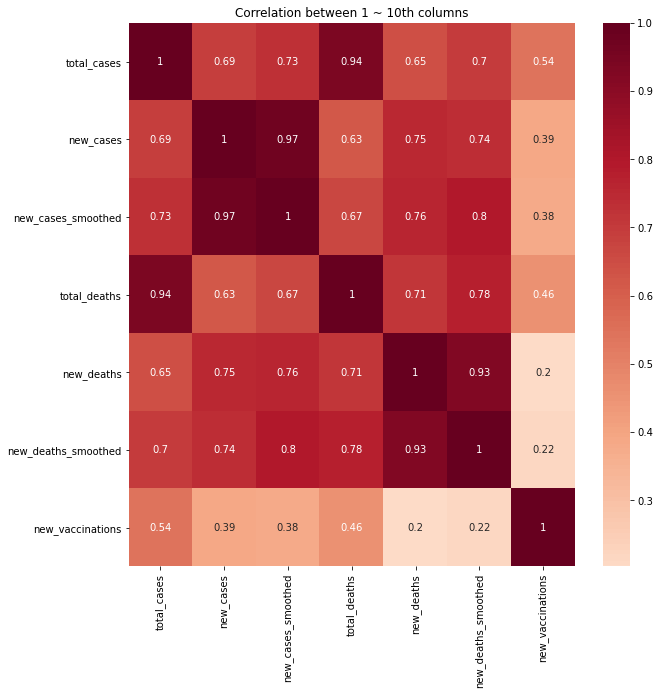

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
co_cols = cols[:10]
co_cols.append('new_vaccinations')
sns.heatmap(g20df[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('Correlation between 1 ~ 10th columns')
plt.show()

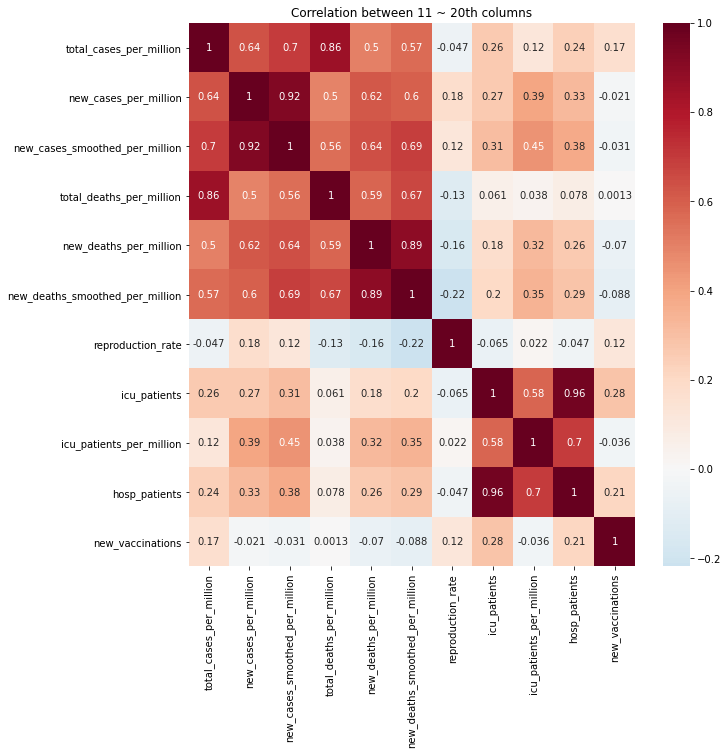

In [15]:
corr_remove = []
co_cols = cols[10:20]
co_cols.append('new_vaccinations')
plt.figure(figsize=(10,10))
sns.heatmap(g20df[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('Correlation between 11 ~ 20th columns')
plt.show()

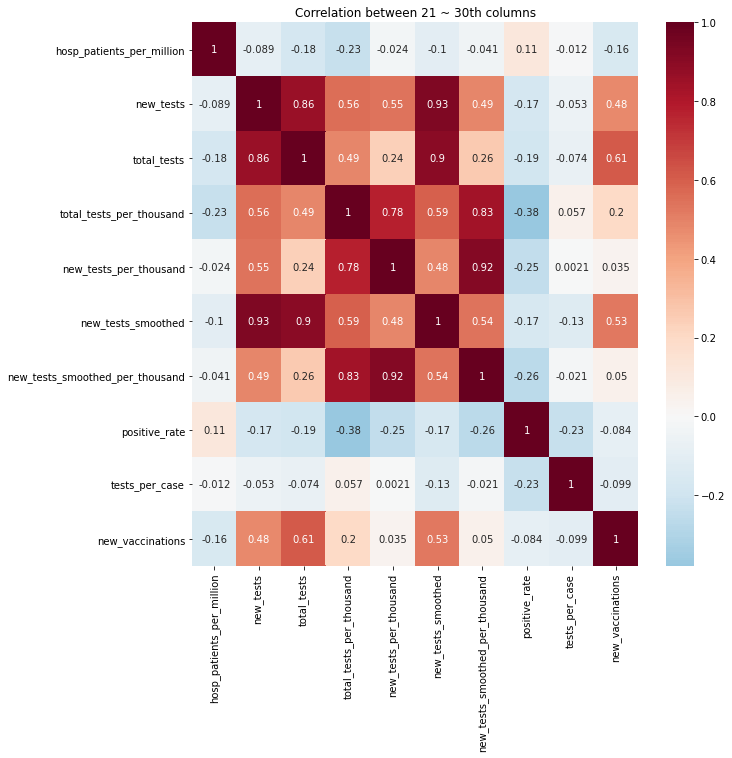

In [16]:
corr_remove = []
co_cols = cols[20:30]
co_cols.append('new_vaccinations')
plt.figure(figsize=(10,10))
sns.heatmap(g20df[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('Correlation between 21 ~ 30th columns')
plt.show()

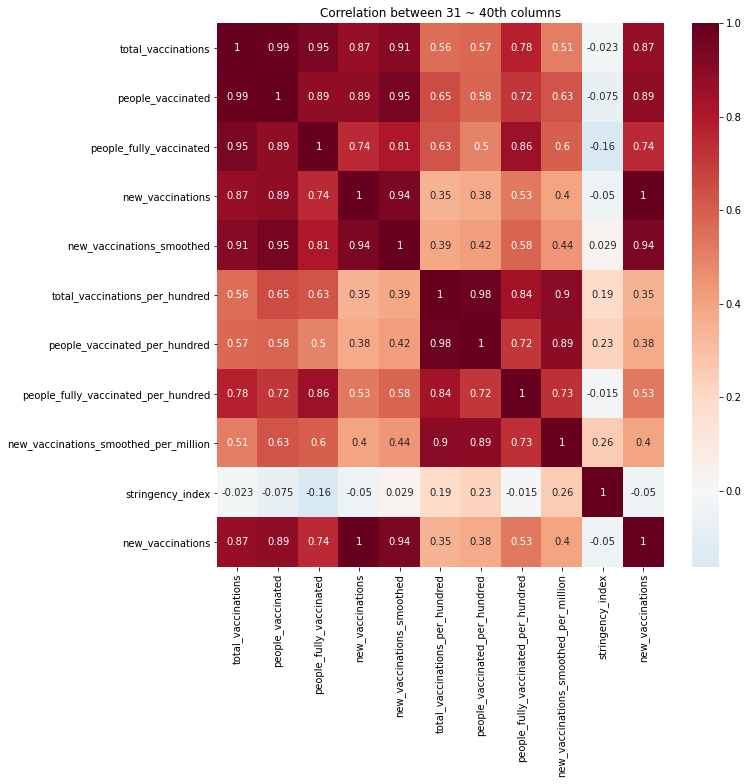

In [17]:
corr_remove = []
co_cols = cols[30:40]
co_cols.append('new_vaccinations')
plt.figure(figsize=(10,10))
sns.heatmap(g20df[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('Correlation between 31 ~ 40th columns')
plt.show()

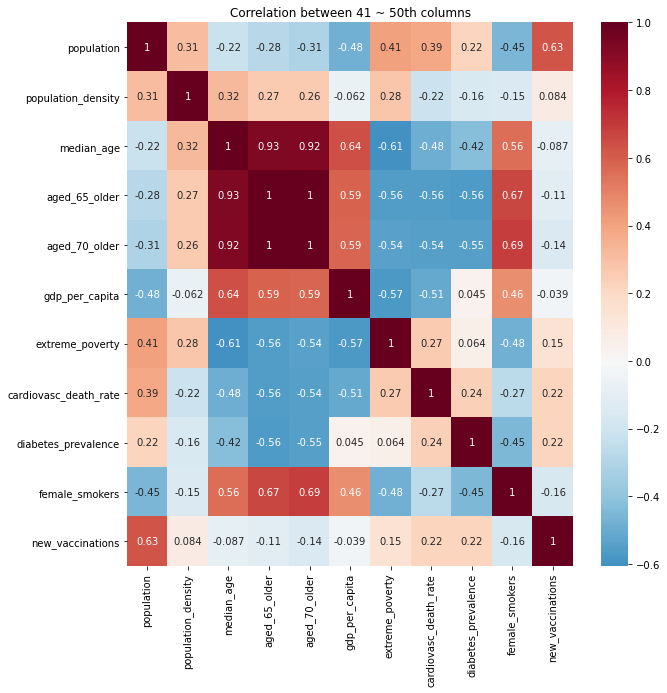

In [18]:
corr_remove = []
co_cols = cols[40:50]
co_cols.append('new_vaccinations')
plt.figure(figsize=(10,10))
sns.heatmap(g20df[co_cols].corr(), cmap='RdBu_r', annot=True, center=0.0)
plt.title('Correlation between 41 ~ 50th columns')
plt.show()

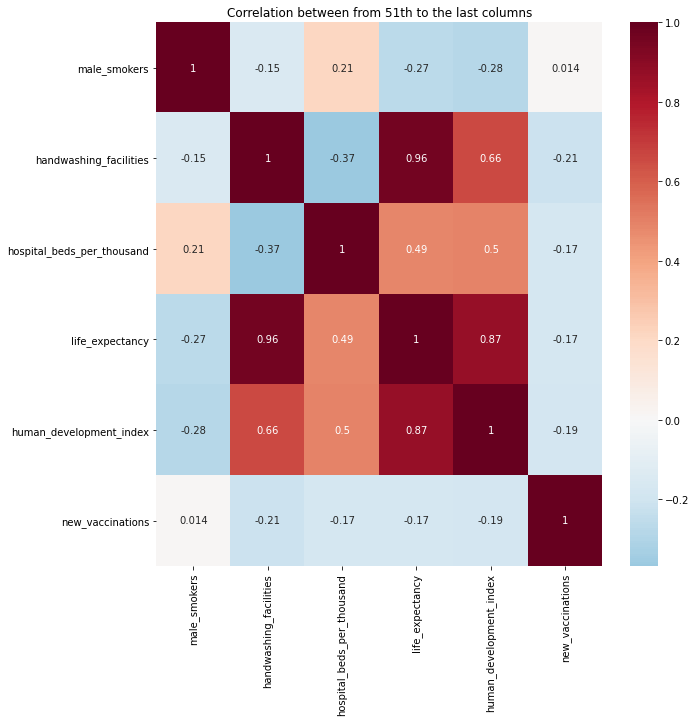

In [19]:
corr_remove = []
co_cols = cols[50:]
co_cols.append('new_vaccinations')
plt.figure(figsize=(10,10))
sns.heatmap(g20df[co_cols].corr(), cmap='RdBu_r', annot=True, center=0)
plt.title('Correlation between from 51th to the last columns')
plt.show()

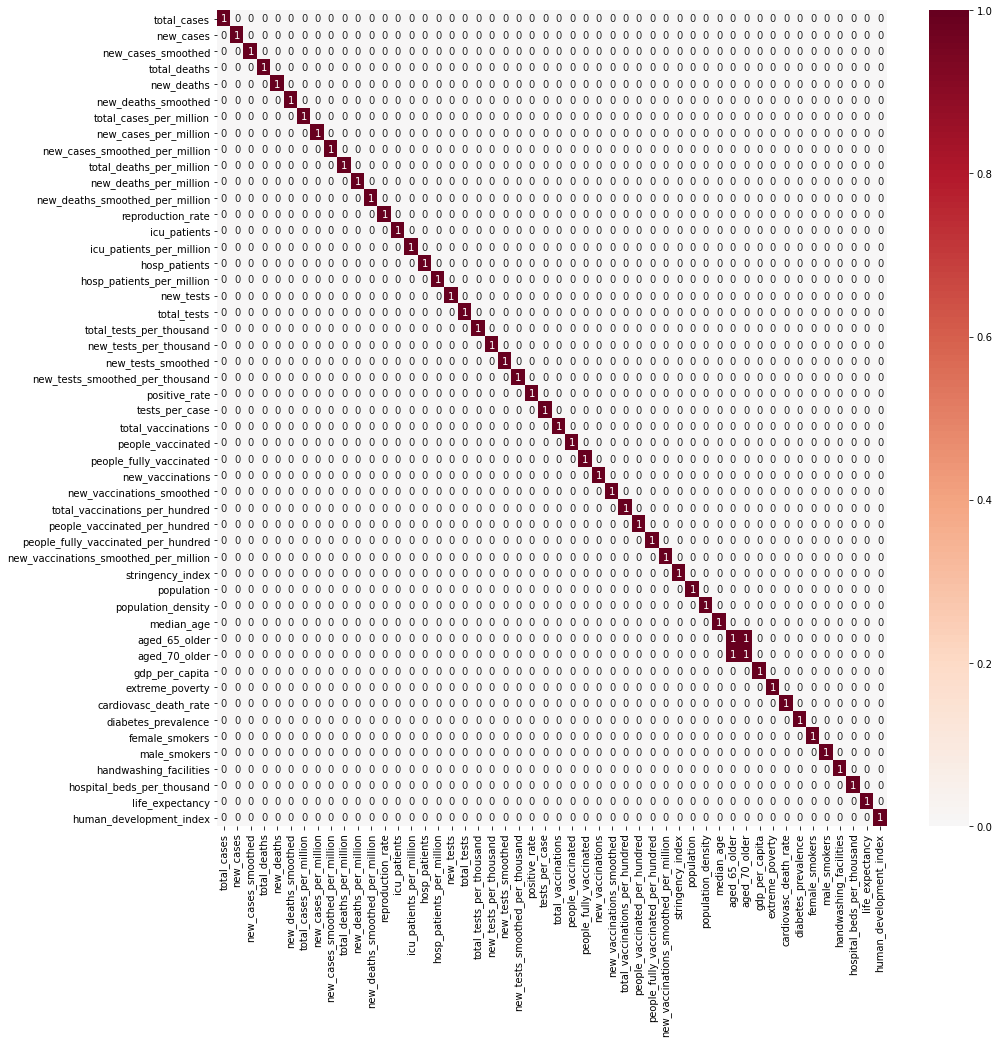

In [20]:
corr = g20df.corr()
high_corr = (corr >= 0.99).astype('uint8')
plt.figure(figsize=(15,15))
sns.heatmap(high_corr, cmap='RdBu_r', annot=True, center=0.0)
plt.show()

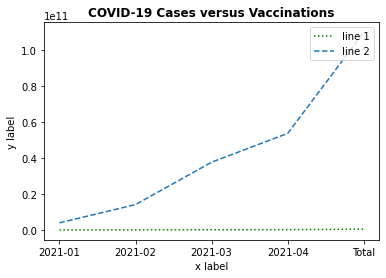

In [30]:
fig, ax = plt.subplots()
ax.plot(organizedg20df['bymonth'],organizedg20df['total_new_cases_from_2021Jan'],color='green', linestyle=':', label='line 1')
ax.plot(organizedg20df['bymonth'],organizedg20df['total_vaccinations'], linestyle='--', label = 'line 2')

ax.legend(loc=1) #

ax.set_title('COVID-19 Cases versus Vaccinations', fontweight='bold',fontsize=18) 


ax.set_xlabel('x label') # add xlabel
ax.set_ylabel('y label'); # add ylabel